In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#White Gaussian Noise ~ 10 sec (20 X 10^-9 sampling rate)
N_samples = int(2e8)
white_noise = np.random.normal(0.0,1.0, N_samples)

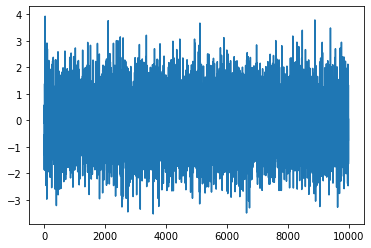

In [3]:
plt.plot(white_noise[:10000])

In [4]:
def gaussian(x,mu):
    numerator = np.exp((-1*(x - mu)**2)/2)
    denominator = np.sqrt(2*np.pi)
    gaussian = 500*(numerator/denominator)
    return gaussian

In [5]:
N = int(2e8)
x = np.linspace(0,N,N)
mu = N/2
gaussian_samples = gaussian(x,mu)

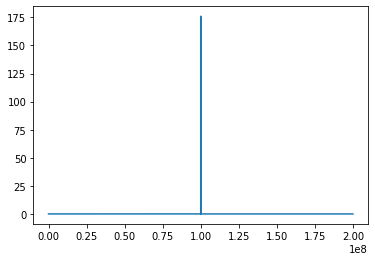

In [6]:
plt.plot(gaussian_samples)

In [7]:
gaussian_timeseries = gaussian_samples
# for i in range(1,1000):
#     d = np.linspace(i*1000, (i+1)*1000, 1000)
#     mu = 500 + i*1000
#     g = gaussian(d,mu)
#     gaussian_timeseries = np.concatenate((gaussian_timeseries,g))

                                

In [8]:
# plt.plot(gaussian_timeseries)
np.shape(gaussian_timeseries)

(200000000,)

In [9]:
final_timeseries = white_noise + gaussian_timeseries

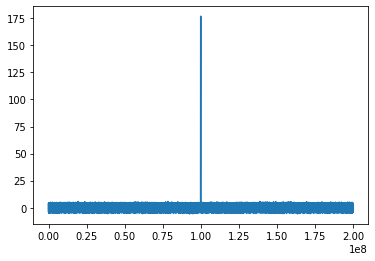

In [10]:
plt.plot(final_timeseries)

In [12]:
Nx = 4096
fft_r = []
fft_i = []
for i in range(N_samples//Nx):
    temp_timeseries = final_timeseries[i*Nx:i*Nx + Nx]
    fft_p = np.fft.fft(temp_timeseries)
    fft_pulsar = fft_p[:int(Nx/2)]
#     fft_pulsar = np.fft.fftshift(fft_pulsar)
    for ff in fft_pulsar:
        fft_r.append(ff.real)
        fft_i.append(ff.imag)

In [13]:
len(fft_r)

99999744

In [14]:
fft_r = np.clip(fft_r,-128,127)
fft_i = np.clip(fft_i,-128,127)

In [15]:
final_fft = []
for i in range(np.shape(fft_r)[0]):
    final_fft.append(fft_r[i])
    final_fft.append(fft_i[i])
final_fft = np.array(final_fft,dtype=int)

In [16]:
final_fft[:5]

array([ 20,   0, -10, -58, -15])

In [18]:
d = np.array(final_fft[:5], dtype = np.int8).tobytes()

In [19]:
d

b'\x14\x00\xf6\xc6\xf1'

In [2]:
h = open('pulsar_sample.vlt','wb')

In [21]:
binary_fft_array = np.array(final_fft, dtype = np.int8).tobytes()
# for i in range(len(final_fft_r)):
#     h.write(final_fft_r[i].to_bytes(1,byteorder='big',signed=True))
#     h.write(final_fft_i[i].to_bytes(1,byteorder='big',signed=True))

In [22]:
h.write(binary_fft_array)

199999488

In [23]:
h.close()

In [79]:
1000000//2048

488

In [80]:
len(final_fft)

999424

In [3]:
#Reading Pulsar Timeseries Raw file
f = open('pulsar_sample.raw','rb')

In [4]:
data = f.read()

In [5]:
byte_array = []
for string in data:
    byte_array.append(np.int8(string))

In [6]:
len(byte_array)//8192

48808

In [7]:
byte_r = byte_array[::2]
byte_i = byte_array[1::2]

byte_r = np.array(byte_r, dtype = int)
byte_i = np.array(byte_i, dtype = int)

In [8]:
complex_volts = byte_r**2 + byte_i**2

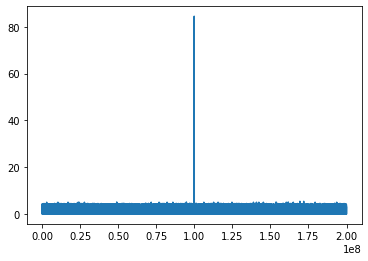

In [9]:
plt.plot(np.sqrt(complex_volts))

In [12]:
np.argmax(complex_volts)

99960461

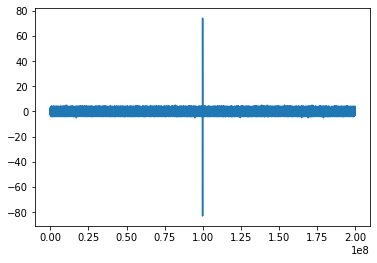

In [12]:
plt.plot(byte_r)

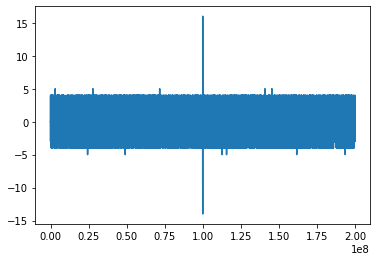

In [13]:
plt.plot(byte_i)

In [11]:
np.max(np.sqrt(complex_volts))

84.52810183601665